In [1]:

#from mpl_toolkits.basemap import Basemap
from pylab import *
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [2]:
cmap_whole = plt.cm.get_cmap('RdBu_r')
cmap55 = cmap_whole(0.01)
cmap50 = cmap_whole(0.05)   #blue
cmap45 = cmap_whole(0.1)
cmap40 = cmap_whole(0.15)
cmap35 = cmap_whole(0.2)
cmap30 = cmap_whole(0.25)
cmap25 = cmap_whole(0.3)
cmap20 = cmap_whole(0.325)
cmap10 = cmap_whole(0.4)
cmap5 = cmap_whole(0.45)
cmap1 = cmap_whole(0.49)
cmap_1 = cmap_whole(0.51)
cmap0 = cmap_whole(0.5)
cmap_5 = cmap_whole(0.55)
cmap_10 = cmap_whole(0.6)
cmap_20 = cmap_whole(0.625)
cmap_25 = cmap_whole(0.7)
cmap_30 = cmap_whole(0.75)
cmap_35 = cmap_whole(0.8)
cmap_40 = cmap_whole(0.85)
cmap_45 = cmap_whole(0.9)
cmap_50 = cmap_whole(0.95)  #red
cmap_55 = cmap_whole(0.99)


colors = [cmap10, cmap1, cmap_1,cmap_5,cmap_10,cmap_20, cmap_25,cmap_30,cmap_35,cmap_40,cmap_45, cmap_50]
colors1 = [cmap_45,cmap_40,cmap_30,cmap_20,cmap_10, cmap_1, cmap1,cmap10,cmap20,cmap30,cmap40,cmap45]
colors2 = colors1[::-1]

colors3 = [cmap_5,cmap_10,cmap_20,cmap_25,cmap_30,cmap_35,cmap_40,cmap_45, cmap_50]
colors4 =[cmap5,cmap10,cmap20,cmap25,cmap30,cmap35,cmap40,cmap45,cmap50]
    
    # declare list of colors for discrete colormap of colorbar
cmaptas = mpl.colors.ListedColormap(colors,N=len(colors))
cmaptas.set_over(cmap_55)
cmaptas.set_under(cmap20)
cmaptas.set_bad(color='0.8')

cmaprms = mpl.colors.ListedColormap(colors2,N=len(colors2))
cmaprms.set_over(cmap_55)
cmaprms.set_under(cmap55)
cmaprms.set_bad(color='0.8')

cmapkge = mpl.colors.ListedColormap(colors1,N=len(colors1))
cmapkge.set_over(cmap55)
cmaptas.set_under(cmap_55)
cmapkge.set_bad(color='0.8')

cmap_r = mpl.colors.ListedColormap(colors3,N=len(colors3))
cmap_r.set_over(cmap_55)
cmap_r.set_bad(color='0.8')

cmap_k = mpl.colors.ListedColormap(colors4,N=len(colors4))
cmap_k.set_over(cmap55)
cmap_k.set_bad(color='0.8')

# colorbar args
values_tas = np.arange(-1.5,7.5,0.75)
values_rms = np.arange(-1.5,1.5,0.25)
values_kge = np.arange(-0.15,0.15,0.025)
tick_locs1 = [-1.5,-1.0,-0.5,0,0.5,1.0,1.5]

norm_tas = mpl.colors.BoundaryNorm(values_tas,cmaptas.N, clip=True)
norm_rms = mpl.colors.BoundaryNorm(values_rms,cmaprms.N, clip=True)
norm_kge = mpl.colors.BoundaryNorm(values_kge,cmapkge.N, clip=True)


values_r= np.arange(0,8,1)
values_k= np.arange(-0.5,1,0.15)

norm_r = mpl.colors.BoundaryNorm(values_r,cmap_r.N, clip=True)
norm_k = mpl.colors.BoundaryNorm(values_k,cmap_k.N, clip=True)



## Plot difference in temperature between reconstructed and standard grid output

### Air temperature

In [3]:
model1 = 'cesm2'
realisation1 = 'r1i1p1f1'
model2 = 'ukesm'
realisation2 = 'r1i1p1f2'
mnlut1=xr.open_dataset('CMIP/mnLut_'+ model1 + '_' + realisation1 +'.nc')
tas1 = xr.open_dataset('CMIP/tas_'+ model1 + '_' + realisation1 + '.nc')
mnlut2=xr.open_dataset('CMIP/mnLut_'+ model2 + '_' + realisation2 +'.nc')
tas2 = xr.open_dataset('CMIP/tas_'+ model2 + '_' + realisation2 + '.nc')

mnlut1['tasLut'] = mnlut1.tasLut.where(mnlut1.tasLut>200)
mnlut2['tasLut'] = mnlut2.tasLut.where(mnlut2.tasLut>200)


In [4]:
dif1 = mnlut1.copy(deep=True)
a = tas1.tas.values-mnlut1.tasLut.values
dif1['tasLut'].values = a
dif1 = dif1.mean(dim='time')

dif2 = mnlut2.copy(deep = True)
a = tas2.tas.values-mnlut2.tasLut.values
dif2['tasLut'].values=a
dif2 =dif2.mean(dim='time')

dif1.coords['lon'] = (dif1.coords['lon'] + 180) % 360 - 180
dif1 = dif1.sortby(dif1.lon)
dif2.coords['lon'] = (dif2.coords['lon'] + 180) % 360 - 180
dif2 = dif2.sortby(dif2.lon)

/scratch/brussel/vo/000/bvo00012/vsc10314/miniconda/envs/env3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/tmp/ipykernel_508/3503119859.py:14: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax1.background_patch.set_facecolor('0.8')
/tmp/ipykernel_508/3503119859.py:15: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('1')
/tmp/ipykernel_508/3503119859.py:30: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax3.background_patch.set_facecolor('0.8')
/tmp/ipykernel_508/3503119859.py:31: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax

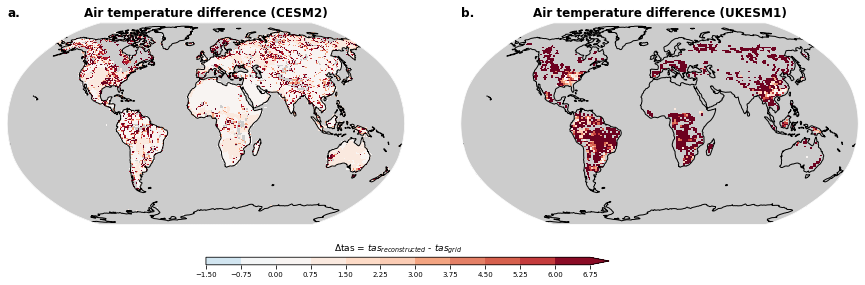

In [52]:
pos1 = [[0.1,0.3,0.4,0.4],[0.55,0.3,0.4,0.4]]
pos2 = [0.3,0.22,0.4,0.015]

lats = dif1.lat.values
lons = dif1.lon.values
lons, lats = np.meshgrid(lons,lats)

fig = plt.figure(figsize =(14, 7))

ax1 = fig.add_axes(pos1[0],projection = ccrs.Robinson())
im1 = dif1.tasLut.plot(ax = ax1,transform = ccrs.PlateCarree(),cmap=cmaptas,norm = norm_tas,add_colorbar=False)

ax1.set_global()
ax1.background_patch.set_facecolor('0.8')
ax1.outline_patch.set_edgecolor('1')
ax1.coastlines()
ax1.set_title('Air temperature difference (CESM2)',fontweight = 'bold')
ax1.set_title('a.',fontweight = 'bold', loc='left')



lats = dif2.lat.values
lons = dif2.lon.values
lons, lats = np.meshgrid(lons,lats)

ax3 = fig.add_axes(pos1[1],projection = ccrs.Robinson())
im2 = dif2.tasLut.plot(ax = ax3,transform = ccrs.PlateCarree(),cmap=cmaptas,norm = norm_tas,add_colorbar=False)

ax3.set_global()
ax3.background_patch.set_facecolor('0.8')
ax3.outline_patch.set_edgecolor('1')
ax3.coastlines()
ax3.set_title('Air temperature difference (UKESM1)',fontweight = 'bold')
ax3.set_title('b.',fontweight = 'bold', loc='left')

cbax = fig.add_axes(pos2)
cb = mpl.colorbar.ColorbarBase(ax=cbax,cmap = cmaptas,
                           norm=norm_tas,
                           ticks = values_tas,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='max')
cb.ax.set_title('\u0394tas = $tas_{reconstructed}$ - $tas_{grid}$', fontsize=9)
cb.ax.tick_params(labelsize=7)
plt.savefig('review_plots/tas_dif_both.png')
#plt.show()

### surface temperature

In [50]:
mnlut3=xr.open_dataset('lstmip/mnLut_'+ model1 +'.nc')
tas3 = xr.open_dataset('lstmip/tslsi_'+ model1 + '_180.nc')
tas3 = tas3.sel(time = slice(tas3.time[23],tas3.time[166]))
tas3 =tas3.assign_coords(time=mnlut3.time)

mnlut3['tslsiLut']=mnlut3.tslsiLut.where(mnlut3.tslsiLut>200)
mnlut3.coords['lon'] = (mnlut3.coords['lon'] + 180) % 360 - 180
mnlut3 = mnlut3.sortby(mnlut3.lon)

dif3 = (tas3.tslsi-mnlut3.tslsiLut).mean(dim='time')

/scratch/brussel/vo/000/bvo00012/vsc10314/miniconda/envs/env3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/tmp/ipykernel_508/3416034903.py:10: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax1.background_patch.set_facecolor('0.8')
/tmp/ipykernel_508/3416034903.py:11: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('1')


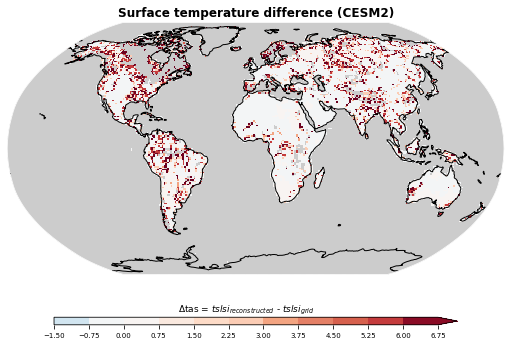

In [53]:
lats = dif3.lat.values
lons = dif3.lon.values
lons, lats = np.meshgrid(lons,lats)

fig = plt.figure(figsize =(14, 7))

ax1 = fig.add_axes([0.25,0.3,0.5,0.5],projection = ccrs.Robinson())
im1 = dif3.plot(ax = ax1,transform = ccrs.PlateCarree(),cmap=cmaptas,norm = norm_tas,add_colorbar=False)
ax1.set_global()
ax1.background_patch.set_facecolor('0.8')
ax1.outline_patch.set_edgecolor('1')
ax1.coastlines()
ax1.set_title('Surface temperature difference (CESM2)',fontweight = 'bold')

cbax = fig.add_axes([0.3,0.2,0.4,0.015])
cb = mpl.colorbar.ColorbarBase(ax=cbax,cmap = cmaptas,
                           norm=norm_tas,
                           ticks = values_tas,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='max')
cb.ax.set_title('\u0394tas = $tslsi_{reconstructed}$ - $tslsi_{grid}$', fontsize=9)
cb.ax.tick_params(labelsize=7)
plt.savefig('review_plots/tslsi_dif_cesm2.png')


## Plot metrics of unmapped

In [21]:
model1 = 'cesm2'

mnlut_rms_1 = xr.open_dataset('review_files/mnlut_rms_'+model1+'_2new.nc')
mnlut_rms_2 = xr.open_dataset('review_files/mnlut_lst_rms_'+model1+'_2new.nc')
mnlut_kge_1 = xr.open_dataset('review_files/mnlut_kge_'+model1+'_2new.nc')
mnlut_kge_2 = xr.open_dataset('review_files/mnlut_lst_kge_'+model1+'_2new.nc')

In [22]:
realisation = 'r1i1p1f1'
mnlut1=xr.open_dataset('CMIP/mnLut_'+ model1 + '_' + realisation +'_obs.nc')
mnlut2=xr.open_dataset('lstmip/mnLut_'+ model1  +'_obs.nc')
mnlut_1 = mnlut1.tasLut.isel(time = 0)
mnlut_1 = mnlut_1.where(mnlut_1>200)
mnlut_2 = mnlut2.tslsiLut.isel(time = 0)
mnlut_2 = mnlut_2.where(mnlut_2>200)

In [23]:
mnlut_rms_1['rmse'] = mnlut_rms_1.rmse.where(~np.isnan(mnlut_1))
mnlut_rms_2['rmse'] = mnlut_rms_2.rmse.where(~np.isnan(mnlut_2))
mnlut_kge_1['kge'] = mnlut_kge_1.kge.where(~np.isnan(mnlut_1))
mnlut_kge_2['kge'] = mnlut_kge_2.kge.where(~np.isnan(mnlut_2))

/tmp/ipykernel_508/1359501290.py:12: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax1.background_patch.set_facecolor('0.8')
/tmp/ipykernel_508/1359501290.py:13: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('1')
/tmp/ipykernel_508/1359501290.py:47: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax3.background_patch.set_facecolor('0.8')
/tmp/ipykernel_508/1359501290.py:48: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax3.outline_patch.set_edgecolor('1')


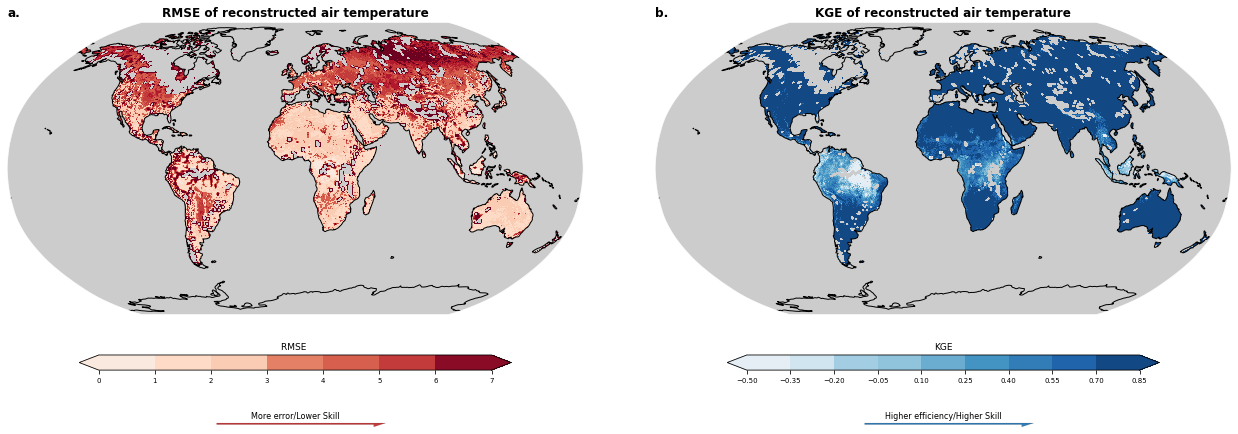

In [30]:
pos1 = [[0.1,0.3,0.4,0.4],[0.55,0.3,0.4,0.4]]
pos2 = [[0.15,0.3,0.3,0.015],[0.6,0.3,0.3,0.015]]


fig = plt.figure(figsize =(20, 14))

ax1 = fig.add_axes(pos1[0],projection = ccrs.Robinson())
im1 = mnlut_rms_1.rmse.plot(ax = ax1,transform = ccrs.PlateCarree(),cmap = cmap_r,norm=norm_r,add_colorbar=False)


ax1.set_global()
ax1.background_patch.set_facecolor('0.8')
ax1.outline_patch.set_edgecolor('1')
ax1.set_title('RMSE of reconstructed air temperature',fontweight = 'bold')
ax1.set_title('a.',fontweight = 'bold', loc='left')
ax1.coastlines()

cbax = fig.add_axes(pos2[0])
cb = mpl.colorbar.ColorbarBase(ax=cbax,cmap=cmap_r,
                           norm=norm_r,
                           ticks = values_r,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='both')
cb.ax.set_title('RMSE ', fontsize=9)

cb.ax.tick_params(labelsize=7)
#plot arrows
bluelabel = 'Less error/Higher Skill'
redlabel = 'More error/Lower Skill'

cb.ax.text(0.5, -3, redlabel, size=8, ha='center', va='center',transform  = cbax.transAxes)


cb.ax.arrow(0.3, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=redlabel,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap_40, edgecolor='k', clip_on=False, transform  = cbax.transAxes)


lats = mnlut_kge_1.lat.values
lons = mnlut_kge_1.lon.values
lons, lats = np.meshgrid(lons,lats)
ax3 = fig.add_axes(pos1[1],projection = ccrs.Robinson())
im1 = mnlut_kge_1.kge.plot(ax = ax3,transform = ccrs.PlateCarree(),cmap=cmap_k,norm = norm_k,add_colorbar=False)

ax3.set_global()
ax3.background_patch.set_facecolor('0.8')
ax3.outline_patch.set_edgecolor('1')
ax3.coastlines()
ax3.set_title('KGE of reconstructed air temperature',fontweight = 'bold')
ax3.set_title('b.',fontweight = 'bold', loc='left')

cbax3 = fig.add_axes(pos2[1])
cb1 = mpl.colorbar.ColorbarBase(ax=cbax3,cmap=cmap_k,
                           norm=norm_k,
                           ticks = values_k,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='both')
cb1.ax.set_title('KGE', fontsize=9)
cb1.ax.tick_params(labelsize=7)

#plot arrows
bluelabel1 = 'Higher efficiency/Higher Skill'

cb1.ax.text(0.5, -3, bluelabel1,size=8, ha='center', va='center',transform  = cbax3.transAxes)

cb1.ax.arrow(0.3, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=bluelabel1,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap40, edgecolor='k', clip_on=False, transform  = cbax3.transAxes)

plt.savefig('unmapped_metrics_air_cesm2.png')

/scratch/brussel/vo/000/bvo00012/vsc10314/miniconda/envs/env3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/tmp/ipykernel_508/1019743327.py:12: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax1.background_patch.set_facecolor('0.8')
/tmp/ipykernel_508/1019743327.py:13: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('1')
/scratch/brussel/vo/000/bvo00012/vsc10314/miniconda/envs/env3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/tmp/ipykernel_508/1019743327.py:44: DeprecationWarning: The 

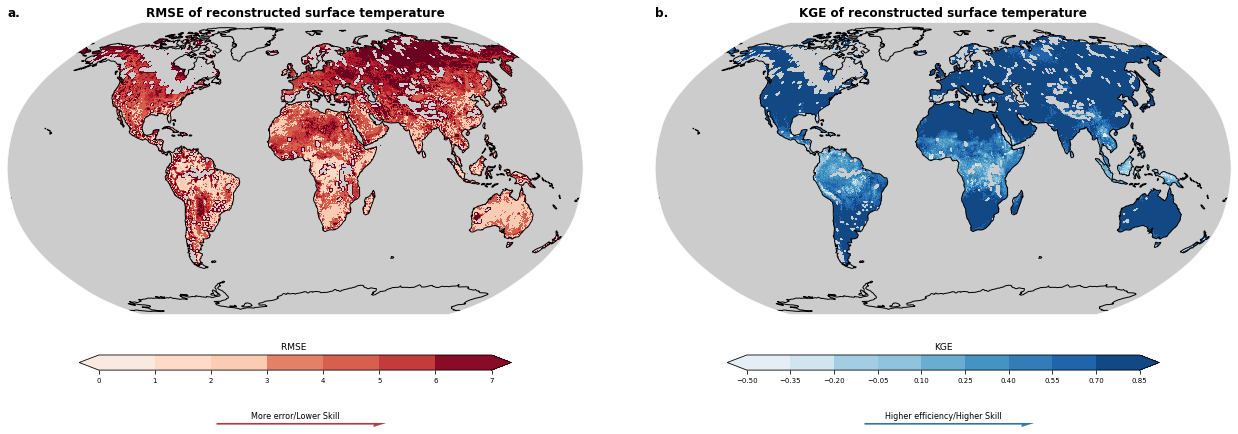

In [32]:
pos1 = [[0.1,0.3,0.4,0.4],[0.55,0.3,0.4,0.4]]
pos2 = [[0.15,0.3,0.3,0.015],[0.6,0.3,0.3,0.015]]


fig = plt.figure(figsize =(20, 14))

ax1 = fig.add_axes(pos1[0],projection = ccrs.Robinson())
im1 = mnlut_rms_2.rmse.plot(ax = ax1,transform = ccrs.PlateCarree(),cmap = cmap_r,norm=norm_r,add_colorbar=False)


ax1.set_global()
ax1.background_patch.set_facecolor('0.8')
ax1.outline_patch.set_edgecolor('1')
ax1.set_title('RMSE of reconstructed surface temperature',fontweight = 'bold')
ax1.set_title('a.',fontweight = 'bold', loc='left')
ax1.coastlines()

cbax = fig.add_axes(pos2[0])
cb = mpl.colorbar.ColorbarBase(ax=cbax,cmap=cmap_r,
                           norm=norm_r,
                           ticks = values_r,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='both')
cb.ax.set_title('RMSE ', fontsize=9)

cb.ax.tick_params(labelsize=7)
#plot arrows
bluelabel = 'Less error/Higher Skill'
redlabel = 'More error/Lower Skill'

cb.ax.text(0.5, -3, redlabel, size=8, ha='center', va='center',transform  = cbax.transAxes)


cb.ax.arrow(0.3, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=redlabel,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap_40, edgecolor='k', clip_on=False, transform  = cbax.transAxes)


ax3 = fig.add_axes(pos1[1],projection = ccrs.Robinson())
im1 = mnlut_kge_2.kge.plot(ax = ax3,transform = ccrs.PlateCarree(),cmap=cmap_k,norm = norm_k,add_colorbar=False)

ax3.set_global()
ax3.background_patch.set_facecolor('0.8')
ax3.outline_patch.set_edgecolor('1')
ax3.coastlines()
ax3.set_title('KGE of reconstructed surface temperature',fontweight = 'bold')
ax3.set_title('b.',fontweight = 'bold', loc='left')

cbax3 = fig.add_axes(pos2[1])
cb1 = mpl.colorbar.ColorbarBase(ax=cbax3,cmap=cmap_k,
                           norm=norm_k,
                           ticks = values_k,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='both')
cb1.ax.set_title('KGE', fontsize=9)
cb1.ax.tick_params(labelsize=7)

#plot arrows
bluelabel1 = 'Higher efficiency/Higher Skill'

cb1.ax.text(0.5, -3, bluelabel1,size=8, ha='center', va='center',transform  = cbax3.transAxes)

cb1.ax.arrow(0.3, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=bluelabel1,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap40, edgecolor='k', clip_on=False, transform  = cbax3.transAxes)

plt.savefig('unmapped_metrics_lst_cesm2.png')

### Plot metrics differences for CESM not corrected

In [33]:
model1 = 'cesm2'
#rmse_mpd_1= xr.open_dataset('review_files/mpd_rms_'+model1+'.nc')
rmse_mpd_1= xr.open_dataset('review_files/mpd_rms_'+model1+'_2new.nc')
rmse_mpd_2= xr.open_dataset('review_files/mpd_lst_rms_'+model1+'_2new.nc')
#kge_mpd_1= xr.open_dataset('review_files/mpd_kge_'+model1+'.nc')
kge_mpd_1= xr.open_dataset('review_files/mpd_kge_'+model1+'_2new.nc')
kge_mpd_2= xr.open_dataset('review_files/mpd_lst_kge_'+model1+'_2new.nc')

In [20]:
rmse_mpd_1.close()
rmse_mpd_2.close()
kge_mpd_1.close()
kge_mpd_2.close()
mnlut_rms_1.close()
mnlut_rms_2.close()
mnlut_kge_1.close()
mnlut_kge_2.close()

In [34]:
#CESM_difs
rmse_dif1 = rmse_mpd_1.rmse - mnlut_rms_1.rmse
kge_dif1 = kge_mpd_1.kge - mnlut_kge_1.kge
rmse_dif2 = rmse_mpd_2.rmse - mnlut_rms_2.rmse
kge_dif2 = kge_mpd_2.kge - mnlut_kge_2.kge
rmse_dif1 =rmse_dif1.reindex(lat=list(reversed(rmse_dif1.lat)))
kge_dif1 =kge_dif1.reindex(lat=list(reversed(kge_dif1.lat)))
rmse_dif2 =rmse_dif2.reindex(lat=list(reversed(rmse_dif2.lat)))
kge_dif2 =kge_dif2.reindex(lat=list(reversed(kge_dif2.lat)))

In [ ]:
pos1 = [[0.1,0.6,0.4,0.35],[0.55,0.6,0.4,0.35],[0.1,0.08,0.4,0.35],[0.55,0.08,0.4,0.35]]
pos2 = [[0.25,0.55,0.5,0.015],[0.25,0.065,0.5,0.015]]


fig= plt.figure(figsize = (20,14))

# lats = rmse_dif1.lat.values
# lons = rmse_dif1.lon.values
# lons, lats = np.meshgrid(lons,lats)

levels = np.arange(-1.5,1.5,0.25)
ax1 = fig.add_axes(pos1[0],projection = ccrs.Robinson())
#ax1.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())

im1 = rmse_dif1.plot(ax=ax1,transform = ccrs.PlateCarree(), cmap = cmaprms, norm = norm_rms,add_colorbar=False)
#im1 = ax1.pcolormesh(lons,lats,rmse_dif1.values,transform = ccrs.PlateCarree(),cmap=cmaprms,norm = norm_rms)
ax1.set_global()
ax1.background_patch.set_facecolor('0.8')
ax1.outline_patch.set_edgecolor('1')
ax1.coastlines()
ax1.set_ylabel('RMSE (not corrected)')
ax1.set_title('Air temperature',fontweight = 'bold')
ax1.set_title('a.',fontweight = 'bold', loc='left')

cbax = fig.add_axes(pos2[0])
cb = mpl.colorbar.ColorbarBase(ax=cbax,cmap=cmaprms,
                           norm=norm_rms,
                           ticks = values_rms,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='both')
cb.ax.set_title('\u0394RMSE = $RMSE_{mapped}$ - $RMSE_{unmapped}$', fontsize=9)
#cb.ax.set_xticklabels(tick_labels1)
cb.ax.tick_params(labelsize=7)
#plot arrows
bluelabel = 'Less error/Higher Skill'
redlabel = 'More error/Lower Skill'

cb.ax.text(0.7, -3, redlabel, size=8, ha='center', va='center',transform  = cbax.transAxes)
cb.ax.text(0.3, -3, bluelabel, size=8, ha='center', va='center', transform  = cbax.transAxes)

cb.ax.arrow(0.5, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=redlabel,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap_40, edgecolor='k', clip_on=False, transform  = cbax.transAxes)
cb.ax.arrow(0.5, -3.5, -0.4, 0, width=0.2, linewidth=0.1, label=bluelabel,\
          shape='right', head_width=0.5, head_length=0.03,\
          facecolor=cmap40, edgecolor='k', clip_on=False, transform  = cbax.transAxes)


# lats1 = rmse_dif2.lat.values
# lons1 = rmse_dif2.lon.values
# lons, lats = np.meshgrid(lons,lats)
ax2 = fig.add_axes(pos1[1],projection = ccrs.Robinson())
#im1 = rmse_dif2.plot(ax=ax2,transform = ccrs.PlateCarree(),cmap=cmaprms, vmin = -1.5, vmax = 1.5)
im1 = rmse_dif2.plot(ax=ax2,transform = ccrs.PlateCarree(), cmap = cmaprms, norm = norm_rms,add_colorbar=False)
#im1 = ax1.pcolormesh(lons,lats,rmse_dif2.values,transform = ccrs.PlateCarree(),cmap=cmaprms,norm = norm_rms)
ax2.set_global()
ax2.background_patch.set_facecolor('0.8')
ax2.outline_patch.set_edgecolor('1')
ax2.coastlines()
ax2.set_title('Surface temperature',fontweight = 'bold')
ax2.set_title('b.',fontweight = 'bold', loc='left')


# lats = kge_dif1.lat.values
# lons = kge_dif1.lon.values
ax3 = fig.add_axes(pos1[2],projection = ccrs.Robinson())
#im1 = ax3.pcolormesh(lons,lats,kge_dif1.values,transform = ccrs.PlateCarree(),cmap=cmapkge,norm = norm_kge)
im1 = kge_dif1.plot(ax=ax3,transform = ccrs.PlateCarree(), cmap = cmapkge, norm = norm_kge,add_colorbar=False)

ax3.set_global()
ax3.background_patch.set_facecolor('0.8')
ax3.outline_patch.set_edgecolor('1')
ax3.coastlines()

ax3.set_ylabel('KGE (not corrected)')
ax3.set_title('c.',fontweight = 'bold', loc='left')

cbax2 = fig.add_axes(pos2[1])
cb1 = mpl.colorbar.ColorbarBase(ax=cbax2,cmap=cmapkge,
                   norm=norm_kge,
                   ticks = values_kge,
                   spacing='proportional',
                   orientation='horizontal',
                   extend='both')
cb1.ax.set_title('\u0394KGE = $KGE_{mapped}$ - $KGE_{unmapped}$', fontsize=9)
#cb1.ax.set_xticklabels(tick_labels2)
#cb1.ax.tick_params(labelsize=7)
#plot arrows
bluelabel1 = 'Higher efficiency/Higher Skill'
redlabel1 = 'Lower efficiency/Lower Skill'

cb1.ax.text(0.7, -3, bluelabel1,size=8, ha='center', va='center',transform  = cbax2.transAxes)
cb1.ax.text(0.3, -3, redlabel1, size=8, ha='center', va='center',transform  = cbax2.transAxes)

cb1.ax.arrow(0.5, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=bluelabel1,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap40, edgecolor='k', clip_on=False, transform  = cbax2.transAxes)
cb1.ax.arrow(0.5, -3.5, -0.4, 0, width=0.2, linewidth=0.1, label=redlabel1,\
          shape='right', head_width=0.5, head_length=0.03,\
          facecolor=cmap_40, edgecolor='k', clip_on=False, transform  = cbax2.transAxes)

# lats1 = kge_dif2.lat.values
# lons1 = kge_dif2.lon.values
ax4 = fig.add_axes(pos1[3],projection = ccrs.Robinson())
#im1 = ax4.pcolormesh(lons,lats,kge_dif2.values,transform = ccrs.PlateCarree(),cmap=cmapkge,norm = norm_kge)
im1 = kge_dif2.plot(ax=ax4,transform = ccrs.PlateCarree(), cmap = cmapkge, norm = norm_kge,add_colorbar=False)


ax4.set_global()
ax4.background_patch.set_facecolor('0.8')
ax4.outline_patch.set_edgecolor('1')
ax4.coastlines()
ax4.set_title('d.',fontweight = 'bold', loc='left')
plt.savefig('mapvctl_cesm2_nocor.png')

/tmp/ipykernel_508/4058627471.py:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax1.background_patch.set_facecolor('0.8')
/tmp/ipykernel_508/4058627471.py:19: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('1')
/scratch/brussel/vo/000/bvo00012/vsc10314/miniconda/envs/env3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/tmp/ipykernel_508/4058627471.py:58: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax2.background_patch.set_facecolor('0.8')
/tmp/ipykernel_508/4058627471.py:59: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax

### Plot differences of CESM corrected

In [6]:
model1 = 'cesm2'

rmse_mpd_1= xr.open_dataset('review_files/mpd_cor_rms_'+model1+'_2new.nc')
rmse_mpd_2= xr.open_dataset('review_files/mpd_lst_cor_rms_'+model1+'_2new.nc')
kge_mpd_1= xr.open_dataset('review_files/mpd_cor_kge_'+model1+'_2new.nc')
kge_mpd_2= xr.open_dataset('review_files/mpd_lst_cor_kge_'+model1+'_2new.nc')
mnlut_rms_1 = xr.open_dataset('review_files/mnlut_cor_rms_'+model1+'_2new.nc')
mnlut_rms_2 = xr.open_dataset('review_files/mnlut_lst_cor_rms_'+model1+'_2new.nc')
mnlut_kge_1 = xr.open_dataset('review_files/mnlut_cor_kge_'+model1+'_2new.nc')
mnlut_kge_2 = xr.open_dataset('review_files/mnlut_lst_cor_kge_'+model1+'_2new.nc')

In [7]:
#CESM_difs
rmse_dif1 = rmse_mpd_1.rmse - mnlut_rms_1.rmse
kge_dif1 = kge_mpd_1.kge - mnlut_kge_1.kge
rmse_dif2 = rmse_mpd_2.rmse - mnlut_rms_2.rmse
kge_dif2 = kge_mpd_2.kge - mnlut_kge_2.kge
rmse_dif1 =rmse_dif1.reindex(lat=list(reversed(rmse_dif1.lat)))
kge_dif1 =kge_dif1.reindex(lat=list(reversed(kge_dif1.lat)))
rmse_dif2 =rmse_dif2.reindex(lat=list(reversed(rmse_dif2.lat)))
kge_dif2 =kge_dif2.reindex(lat=list(reversed(kge_dif2.lat)))


/tmp/ipykernel_13484/4251333914.py:17: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax1.background_patch.set_facecolor('0.8')
/tmp/ipykernel_13484/4251333914.py:18: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('1')
/scratch/brussel/vo/000/bvo00012/vsc10314/miniconda/envs/env3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/tmp/ipykernel_13484/4251333914.py:57: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax2.background_patch.set_facecolor('0.8')
/tmp/ipykernel_13484/4251333914.py:58: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties inste

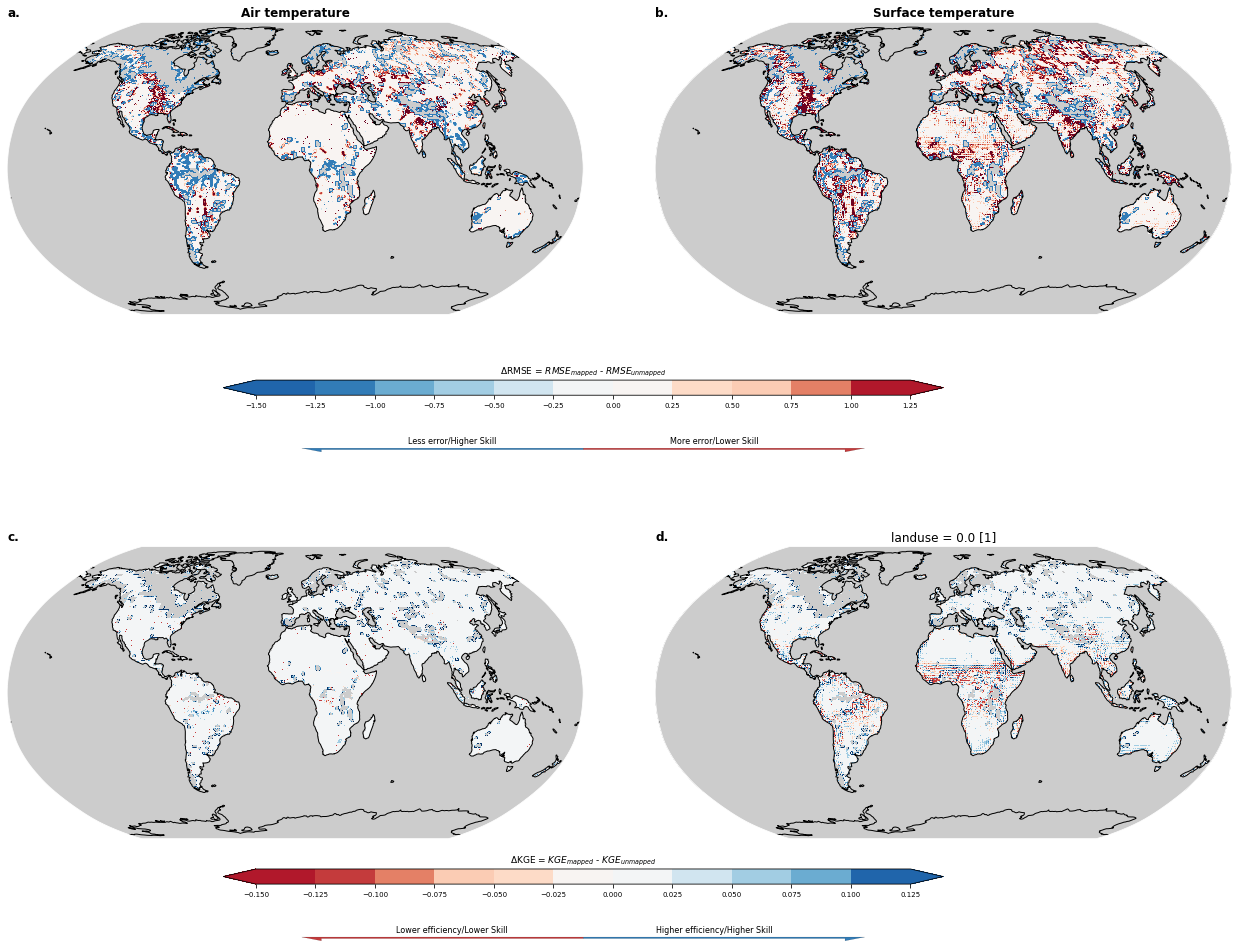

In [10]:
pos1 = [[0.1,0.6,0.4,0.35],[0.55,0.6,0.4,0.35],[0.1,0.08,0.4,0.35],[0.55,0.08,0.4,0.35]]
pos2 = [[0.25,0.55,0.5,0.015],[0.25,0.065,0.5,0.015]]


fig= plt.figure(figsize = (20,14))

# lats = rmse_dif1.lat.values
# lons = rmse_dif1.lon.values
# lons, lats = np.meshgrid(lons,lats)

ax1 = fig.add_axes(pos1[0],projection = ccrs.Robinson())
#im1 = ax1.contourf(lons,lats,rmse_dif1.rmse.values,transform = ccrs.PlateCarree(),cmap=cmaprms,norm = norm_rms)
im1 = rmse_dif1.plot(ax=ax1,transform = ccrs.PlateCarree(), cmap = cmaprms, norm = norm_rms,add_colorbar=False)


ax1.set_global()
ax1.background_patch.set_facecolor('0.8')
ax1.outline_patch.set_edgecolor('1')
ax1.coastlines()
ax1.set_ylabel('RMSE (corrected)')
ax1.set_title('Air temperature',fontweight = 'bold')
ax1.set_title('a.',fontweight = 'bold', loc='left')

cbax = fig.add_axes(pos2[0])
cb = mpl.colorbar.ColorbarBase(ax=cbax,cmap=cmaprms,
                           norm=norm_rms,
                           ticks = values_rms,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='both')
cb.ax.set_title('\u0394RMSE = $RMSE_{mapped}$ - $RMSE_{unmapped}$', fontsize=9)
#cb.ax.set_xticklabels(tick_labels1)
cb.ax.tick_params(labelsize=7)
#plot arrows
bluelabel = 'Less error/Higher Skill'
redlabel = 'More error/Lower Skill'

cb.ax.text(0.7, -3, redlabel, size=8, ha='center', va='center',transform  = cbax.transAxes)
cb.ax.text(0.3, -3, bluelabel, size=8, ha='center', va='center', transform  = cbax.transAxes)

cb.ax.arrow(0.5, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=redlabel,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap_40, edgecolor='k', clip_on=False, transform  = cbax.transAxes)
cb.ax.arrow(0.5, -3.5, -0.4, 0, width=0.2, linewidth=0.1, label=bluelabel,\
          shape='right', head_width=0.5, head_length=0.03,\
          facecolor=cmap40, edgecolor='k', clip_on=False, transform  = cbax.transAxes)


# lats = rmse_dif2.lat.values
# lons = rmse_dif2.lon.values
# lons, lats = np.meshgrid(lons,lats)
ax2 = fig.add_axes(pos1[1],projection = ccrs.Robinson())
#im1 = ax2.contourf(lons,lats,rmse_dif2.rmse.values,transform = ccrs.PlateCarree(),cmap=cmaprms,norm = norm_rms)
im1 = rmse_dif2.plot(ax=ax2,transform = ccrs.PlateCarree(), cmap = cmaprms, norm = norm_rms,add_colorbar=False)

ax2.set_global()
ax2.background_patch.set_facecolor('0.8')
ax2.outline_patch.set_edgecolor('1')
ax2.coastlines()
ax2.set_title('Surface temperature',fontweight = 'bold')
ax2.set_title('b.',fontweight = 'bold', loc='left')


# lats = kge_dif1.lat.values
# lons = kge_dif1.lon.values
ax3 = fig.add_axes(pos1[2],projection = ccrs.Robinson())
#im1 = ax3.contourf(lons,lats,kge_dif1.kge.values,transform = ccrs.PlateCarree(),shading='flat',cmap=cmapkge,norm = norm_kge,latlon=True)
im1 = kge_dif1.plot(ax=ax3,transform = ccrs.PlateCarree(), cmap = cmapkge, norm = norm_kge,add_colorbar=False)

ax3.set_global()
ax3.background_patch.set_facecolor('0.8')
ax3.outline_patch.set_edgecolor('1')
ax3.coastlines()

ax3.set_ylabel('KGE (corrected)')
ax3.set_title('c.',fontweight = 'bold', loc='left')

cbax2 = fig.add_axes(pos2[1])
cb1 = mpl.colorbar.ColorbarBase(ax=cbax2,cmap=cmapkge,
                   norm=norm_kge,
                   ticks = values_kge,
                   spacing='proportional',
                   orientation='horizontal',
                   extend='both')
cb1.ax.set_title('\u0394KGE = $KGE_{mapped}$ - $KGE_{unmapped}$', fontsize=9)
#cb1.ax.set_xticklabels(tick_labels2)
cb1.ax.tick_params(labelsize=7)
#plot arrows
bluelabel1 = 'Higher efficiency/Higher Skill'
redlabel1 = 'Lower efficiency/Lower Skill'

cb1.ax.text(0.7, -3, bluelabel1,size=8, ha='center', va='center',transform  = cbax2.transAxes)
cb1.ax.text(0.3, -3, redlabel1, size=8, ha='center', va='center',transform  = cbax2.transAxes)

cb1.ax.arrow(0.5, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=bluelabel1,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap40, edgecolor='k', clip_on=False, transform  = cbax2.transAxes)
cb1.ax.arrow(0.5, -3.5, -0.4, 0, width=0.2, linewidth=0.1, label=redlabel1,\
          shape='right', head_width=0.5, head_length=0.03,\
          facecolor=cmap_40, edgecolor='k', clip_on=False, transform  = cbax2.transAxes)

# lats = kge_dif2.lat.values
# lons = kge_dif2.lon.values
ax4 = fig.add_axes(pos1[3],projection = ccrs.Robinson())
#im1 = ax4.contourf(lons,lats,kge_dif2.kge.values,transform = ccrs.PlateCarree(),shading='flat',cmap=cmapkge,norm = norm_kge,latlon=True)
im1 = kge_dif2.plot(ax=ax4,transform = ccrs.PlateCarree(), cmap = cmapkge, norm = norm_kge,add_colorbar=False)

ax4.set_global()
ax4.background_patch.set_facecolor('0.8')
ax4.outline_patch.set_edgecolor('1')
ax4.coastlines()
ax4.set_title('d.',fontweight = 'bold', loc='left')

plt.savefig('mapvctl_cesm2_cor.png')

### Box Plots

In [5]:
domair= xr.open_dataset('review_files/domlaf_air.nc')
domair_cor= domair.sel(lat = slice(83.4,-55.15),lon = slice(-180.0,178.75))
domsfc= xr.open_dataset('review_files/dom_laf.nc')
domsfc_cor = domsfc.sel(lat = slice(83.4,-55.15),lon = slice(-180.0,178.75))


In [68]:
mnlut_cor=xr.open_dataset('review_files/mnlut_tascor_'+ model1+'_2new.nc')
mnlut_avc = mnlut_cor.tasLut.mean(dim = 'time')
realisation = 'r1i1p1f1'
mnlut=xr.open_dataset('CMIP/mnLut_'+ model1 + '_' + realisation +'_obs.nc')
mnlut_av = mnlut.tasLut.mean(dim = 'time')

In [73]:
mnlut_lst=xr.open_dataset('lstmip/mnLut_'+ model1  +'_obs.nc')
mnlut_avlst = mnlut_lst.tslsiLut.mean(dim = 'time')
mnlut_avlstcor = mnlut_avlst.sel(lat = slice(83.4,-55.15),lon = slice(-180.0,178.75))

In [74]:
rmse_mpd_1['rmse']=rmse_mpd_1.rmse.where(mnlut_av>200)
kge_mpd_1['kge']=kge_mpd_1.kge.where(mnlut_av>200)
rmse_mpd_1c['rmse']=rmse_mpd_1c.rmse.where(mnlut_avc>200)
kge_mpd_1c['kge']=kge_mpd_1c.kge.where(mnlut_avc>200)

rmse_mpd_2['rmse']=rmse_mpd_2.rmse.where(mnlut_avlst>200)
kge_mpd_2['kge']=kge_mpd_2.kge.where(mnlut_avlst>200)
rmse_mpd_2c['rmse']=rmse_mpd_2c.rmse.where(mnlut_avlstcor>200)
kge_mpd_2c['kge']=kge_mpd_2c.kge.where(mnlut_avlstcor>200)

In [3]:
model1 = 'cesm2'

mnlut_rms_1 = xr.open_dataset('review_files/mnlut_rms_'+model1+'_2new.nc')
mnlut_rms_2 = xr.open_dataset('review_files/mnlut_lst_rms_'+model1+'_2new.nc')
mnlut_kge_1 = xr.open_dataset('review_files/mnlut_kge_'+model1+'_2new.nc')
mnlut_kge_2 = xr.open_dataset('review_files/mnlut_lst_kge_'+model1+'_2new.nc')
rmse_mpd_1= xr.open_dataset('review_files/mpd_rms_'+model1+'_2new.nc')
rmse_mpd_2= xr.open_dataset('review_files/mpd_lst_rms_'+model1+'_2new.nc')
#kge_mpd_1= xr.open_dataset('review_files/mpd_kge_'+model1+'.nc')
kge_mpd_1= xr.open_dataset('review_files/mpd_kge_'+model1+'_2new.nc')
kge_mpd_2= xr.open_dataset('review_files/mpd_lst_kge_'+model1+'_2new.nc')

In [5]:
rmse_mpd_1c= xr.open_dataset('review_files/mpd_cor_rms_'+model1+'_2new.nc')
rmse_mpd_2c= xr.open_dataset('review_files/mpd_lst_cor_rms_'+model1+'_2new.nc')
kge_mpd_1c= xr.open_dataset('review_files/mpd_cor_kge_'+model1+'_2new.nc')
kge_mpd_2c= xr.open_dataset('review_files/mpd_lst_cor_kge_'+model1+'_2new.nc')


In [12]:
rmse_mpd_1['dom']  = domair.dom
rmse_mpd_2['dom']  = domsfc.dom
mnlut_rms_1['dom']  = domair.dom
mnlut_rms_2['dom']  = domsfc.dom
kge_mpd_1['dom']  = domair.dom
kge_mpd_2['dom']  = domsfc.dom
mnlut_kge_1['dom']  = domair.dom
mnlut_kge_2['dom']  = domsfc.dom

In [15]:
rmse_mpd_1c['dom']  = domair_cor.dom
rmse_mpd_2c['dom']  = domsfc_cor.dom

kge_mpd_1c['dom']  = domair_cor.dom
kge_mpd_2c['dom']  = domsfc_cor.dom


In [75]:
#FOR LST 
datlst = [rmse_mpd_2, kge_mpd_2, mnlut_rms_2, mnlut_kge_2,rmse_mpd_2c, kge_mpd_2c]
rmslst2= []
kgelst2 = []
for i in range(3):
    j=i+1
    rmse_laf_m = datlst[0].rmse.where(datlst[0].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    kge_laf_m = datlst[1].kge.where(datlst[1].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    rmse_laf_u = datlst[2].rmse.where(datlst[2].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    kge_laf_u = datlst[3].kge.where(datlst[3].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    rmse_laf_mc = datlst[4].rmse.where(datlst[4].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    kge_laf_mc = datlst[5].kge.where(datlst[5].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    rmslst2.append(rmse_laf_u)
    rmslst2.append(rmse_laf_m)
    rmslst2.append(rmse_laf_mc)
    kgelst2.append(kge_laf_u)
    kgelst2.append(kge_laf_m)
    kgelst2.append(kge_laf_mc)


In [76]:
datlst1 = [rmse_mpd_1, kge_mpd_1, mnlut_rms_1, mnlut_kge_1,rmse_mpd_1c, kge_mpd_1c]
rmstas2= []
kgetas2 = []
for i in range(3):
    j=i+1
    rmse_laf_m = datlst1[0].rmse.where(datlst1[0].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    kge_laf_m = datlst1[1].kge.where(datlst1[1].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    rmse_laf_u = datlst1[2].rmse.where(datlst1[2].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    kge_laf_u = datlst1[3].kge.where(datlst1[3].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    rmse_laf_mc = datlst1[4].rmse.where(datlst1[4].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    kge_laf_mc = datlst1[5].kge.where(datlst1[5].dom == j).stack(z = ("lat","lon")).dropna(dim = 'z')
    rmstas2.append(rmse_laf_u)
    rmstas2.append(rmse_laf_m)
    rmstas2.append(rmse_laf_mc)
    kgetas2.append(kge_laf_u)
    kgetas2.append(kge_laf_m)
    kgetas2.append(kge_laf_mc)

In [77]:
med_rmstas=[]
med_rmstsl=[]
med_kgetas=[]
med_kgetsl=[]
for i in range(len(rmstas2)):
    med1 = rmstas2[i].median()
    med2 = rmslst2[i].median()
    med3 = kgetas2[i].median()
    med4 = kgelst2[i].median()
    med_rmstas.append(med1)
    med_rmstsl.append(med2)
    med_kgetas.append(med3)
    med_kgetsl.append(med4)

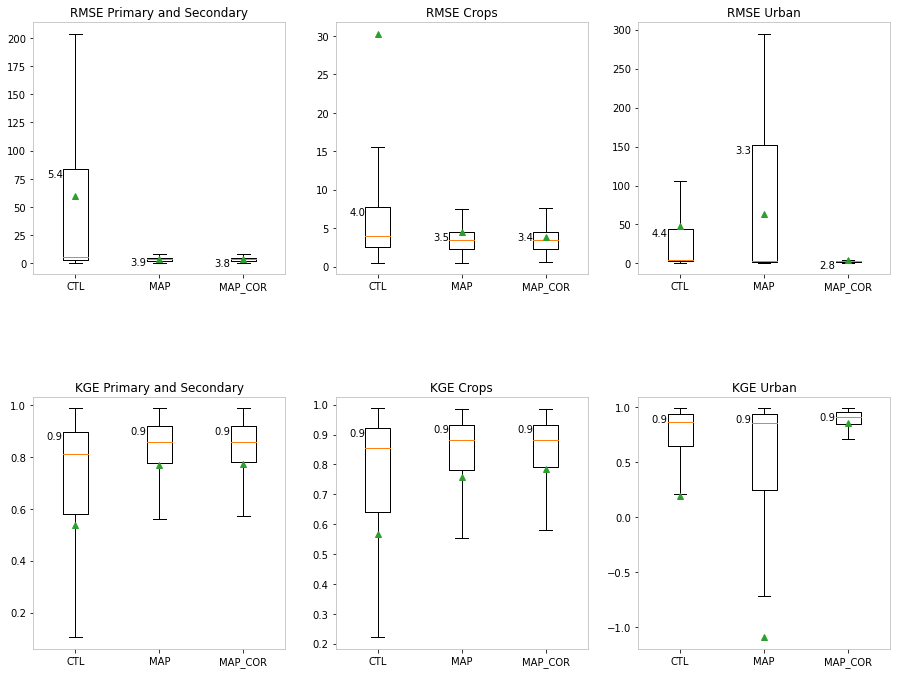

In [79]:
pos1 = [[0.1,0.6,0.25,0.35],[0.4,0.6,0.25,0.35], [0.7,0.6,0.25,0.35]]
pos2 = [[0.1,0.08,0.25,0.35],[0.4,0.08,0.25,0.35],[0.7,0.08,0.25,0.35]]
titles = ['Primary and Secondary', 'Crops', 'Urban']

fig = plt.figure(figsize = (14,10))

for i in range(3):
    j = 3*i
    ax1 = fig.add_axes(pos1[i])
    bp_dict1 = boxplot(rmstas2[j:j+3],  showmeans=True, showfliers = False)
    ax1.spines['bottom'].set_color('0.75')
    ax1.spines['top'].set_color('0.75') 
    ax1.spines['right'].set_color('0.75')
    ax1.spines['left'].set_color('0.75')
    ax1.set_title('RMSE '+titles[i])
    ax1.set_xticklabels(['CTL','MAP','MAP_COR'])
    
    for k in range(len(bp_dict1['boxes'])):
        line =  bp_dict1['boxes'][k]
        x, y = line.get_xydata()[3] # bottom of right line
        text(x,y, '%.1f' % med_rmstas[j+k],
             horizontalalignment='right', # centered
                 verticalalignment='top') 


    ax1 = fig.add_axes(pos2[i])
    bp_dict2 = boxplot(kgetas2[j:j+3],  showmeans=True, showfliers = False)
    ax1.spines['bottom'].set_color('0.75')
    ax1.spines['top'].set_color('0.75') 
    ax1.spines['right'].set_color('0.75')
    ax1.spines['left'].set_color('0.75')
    ax1.set_title('KGE '+titles[i])
    ax1.set_xticklabels(['CTL','MAP','MAP_COR'])
    
    for l in range(len(bp_dict2['boxes'])):
        line =  bp_dict2['boxes'][l]
        x, y = line.get_xydata()[3] # bottom of right line
        text(x,y, '%.1f' % med_kgetas[j+k],
             horizontalalignment='right', # centered
                 verticalalignment='top') 

plt.savefig('bp_laf_cesm2_air.png')


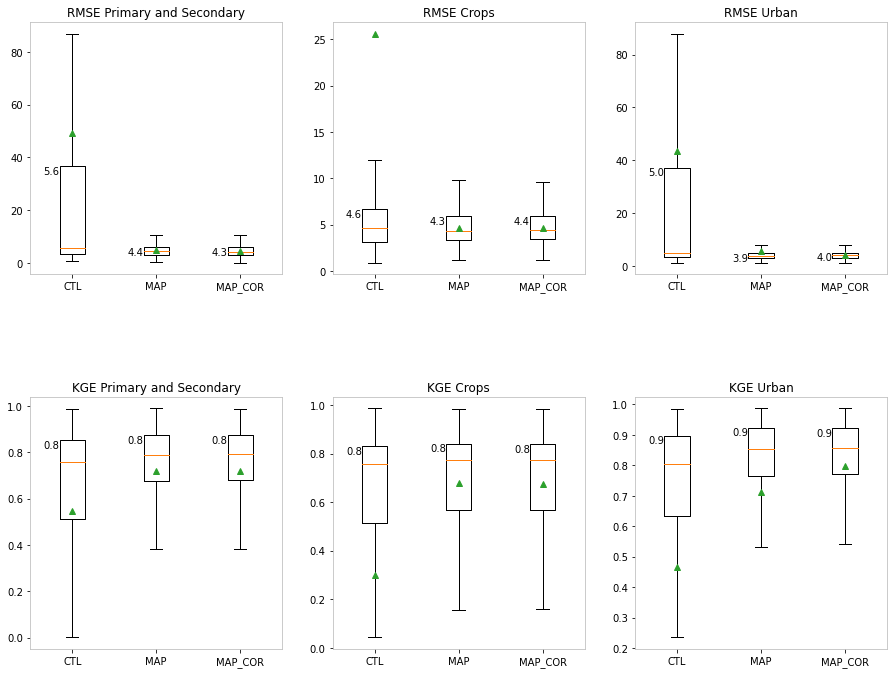

In [80]:
pos1 = [[0.1,0.6,0.25,0.35],[0.4,0.6,0.25,0.35], [0.7,0.6,0.25,0.35]]
pos2 = [[0.1,0.08,0.25,0.35],[0.4,0.08,0.25,0.35],[0.7,0.08,0.25,0.35]]
titles = ['Primary and Secondary', 'Crops', 'Urban']

fig = plt.figure(figsize = (14,10))

for i in range(3):
    j = 3*i
    ax1 = fig.add_axes(pos1[i])
    bp_dict1 = boxplot(rmslst2[j:j+3],  showmeans=True, showfliers = False)
    ax1.spines['bottom'].set_color('0.75')
    ax1.spines['top'].set_color('0.75') 
    ax1.spines['right'].set_color('0.75')
    ax1.spines['left'].set_color('0.75')
    ax1.set_title('RMSE '+titles[i])
    ax1.set_xticklabels(['CTL','MAP','MAP_COR'])
    
    for k in range(len(bp_dict1['boxes'])):
        line =  bp_dict1['boxes'][k]
        x, y = line.get_xydata()[3] # bottom of right line
        text(x,y, '%.1f' % med_rmstsl[j+k],
             horizontalalignment='right', # centered
                 verticalalignment='top') 


    ax1 = fig.add_axes(pos2[i])
    bp_dict2 = boxplot(kgelst2[j:j+3],  showmeans=True, showfliers = False)
    ax1.spines['bottom'].set_color('0.75')
    ax1.spines['top'].set_color('0.75') 
    ax1.spines['right'].set_color('0.75')
    ax1.spines['left'].set_color('0.75')
    ax1.set_title('KGE '+titles[i])
    ax1.set_xticklabels(['CTL','MAP','MAP_COR'])
    
    for l in range(len(bp_dict2['boxes'])):
        line =  bp_dict2['boxes'][l]
        x, y = line.get_xydata()[3] # bottom of right line
        text(x,y, '%.1f' % med_kgetsl[j+k],
             horizontalalignment='right', # centered
                 verticalalignment='top') 


plt.savefig('bp_laf_cesm2_sfc.png')


In [6]:
rmse_mpd1_s = rmse_mpd_1.rmse.stack(z = ("lat","lon")).dropna(dim = 'z')
rmse_mpd1_sc = rmse_mpd_1c.rmse.stack(z = ("lat","lon")).dropna(dim = 'z')
mnlut1_rms1_s = mnlut_rms_1.rmse.stack(z = ("lat","lon")).dropna(dim = 'z')

kge_mpd1_s = kge_mpd_1.kge.stack(z = ("lat","lon")).dropna(dim = 'z')
kge_mpd1_sc = kge_mpd_1c.kge.stack(z = ("lat","lon")).dropna(dim = 'z')
mnlut1_kge1_s = mnlut_kge_1.kge.stack(z = ("lat","lon")).dropna(dim = 'z')

rmse_mpd2_s = rmse_mpd_2.rmse.stack(z = ("lat","lon")).dropna(dim = 'z')
rmse_mpd2_sc = rmse_mpd_2c.rmse.stack(z = ("lat","lon")).dropna(dim = 'z')
mnlut_rms2_s = mnlut_rms_2.rmse.stack(z = ("lat","lon")).dropna(dim = 'z')


kge_mpd2_s = kge_mpd_2.kge.stack(z = ("lat","lon")).dropna(dim = 'z')
kge_mpd2_sc = kge_mpd_2c.kge.stack(z = ("lat","lon")).dropna(dim = 'z')
mnlut_kge2_s = mnlut_kge_2.kge.stack(z = ("lat","lon")).dropna(dim = 'z')

rmses_air = [mnlut1_rms1_s,rmse_mpd1_s,rmse_mpd1_sc]
rmses_sfc = [mnlut_rms2_s,rmse_mpd2_s,rmse_mpd2_sc]
kges_air = [mnlut1_kge1_s,kge_mpd1_s,kge_mpd1_sc]
kges_sfc = [ mnlut_kge2_s,kge_mpd2_s,kge_mpd2_sc]

In [8]:
med_rmsair=[]
med_rmssfc=[]
med_kgeair=[]
med_kgesfc=[]
for i in range(3):
    med1 = rmses_air[i].median()
    med2 = rmses_sfc[i].median()
    med3 = kges_air[i].median()
    med4 = kges_sfc[i].median()
    med_rmsair.append(med1)
    med_rmssfc.append(med2)
    med_kgeair.append(med3)
    med_kgesfc.append(med4)

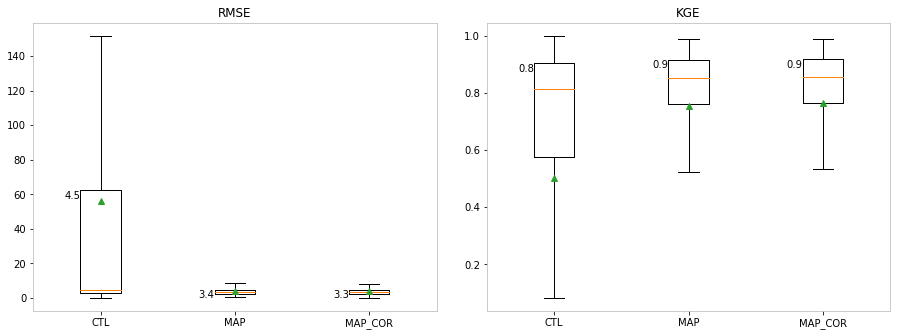

In [9]:
#OVERALL Metrics

pos =  [[0.1,0.3,0.4,0.4],[0.55,0.3,0.4,0.4]]
fig = plt.figure(figsize = (14,10))

ax1 = fig.add_axes(pos[0])
bp_dict1 =boxplot(rmses_air,  showmeans=True, showfliers = False)
ax1.spines['bottom'].set_color('0.75')
ax1.spines['top'].set_color('0.75') 
ax1.spines['right'].set_color('0.75')
ax1.spines['left'].set_color('0.75')
ax1.set_title('RMSE')
ax1.set_xticklabels(['CTL','MAP','MAP_COR'])

for i in range(len(bp_dict1['boxes'])):
    line =  bp_dict1['boxes'][i]
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % med_rmsair[i],
         horizontalalignment='right', # centered
             verticalalignment='top') 



ax1 = fig.add_axes(pos[1])
bp_dict2 =boxplot(kges_air,  showmeans=True, showfliers = False)
ax1.spines['bottom'].set_color('0.75')
ax1.spines['top'].set_color('0.75') 
ax1.spines['right'].set_color('0.75')
ax1.spines['left'].set_color('0.75')
ax1.set_title('KGE')
ax1.set_xticklabels(['CTL','MAP','MAP_COR'])

for j in range(len(bp_dict2['boxes'])):
    line =  bp_dict2['boxes'][j]
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % med_kgeair[j],
         horizontalalignment='right', # centered
             verticalalignment='top') 


plt.savefig('bp_all_cesm2_air.png')

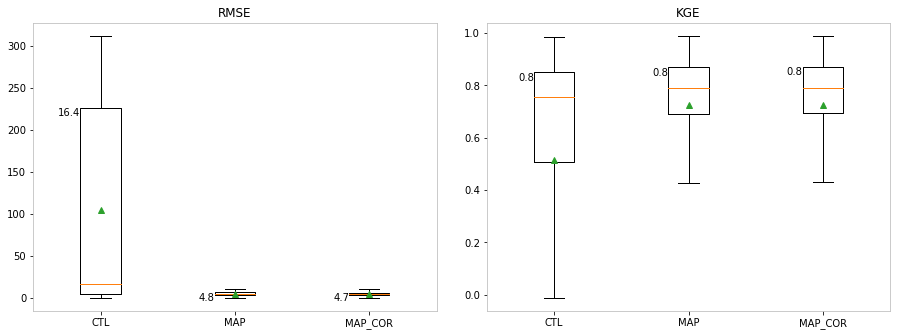

In [10]:
#OVERALL Metrics

pos =  [[0.1,0.3,0.4,0.4],[0.55,0.3,0.4,0.4]]
fig = plt.figure(figsize = (14,10))

ax1 = fig.add_axes(pos[0])
bp_dict1 =boxplot(rmses_sfc,  showmeans=True, showfliers = False)
ax1.spines['bottom'].set_color('0.75')
ax1.spines['top'].set_color('0.75') 
ax1.spines['right'].set_color('0.75')
ax1.spines['left'].set_color('0.75')
ax1.set_title('RMSE')
ax1.set_xticklabels(['CTL','MAP','MAP_COR'])

for i in range(len(bp_dict1['boxes'])):
    line =  bp_dict1['boxes'][i]
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % med_rmssfc[i],
         horizontalalignment='right', # centered
             verticalalignment='top') 


ax1 = fig.add_axes(pos[1])
bp_dict2 =boxplot(kges_sfc,  showmeans=True, showfliers = False)
ax1.spines['bottom'].set_color('0.75')
ax1.spines['top'].set_color('0.75') 
ax1.spines['right'].set_color('0.75')
ax1.spines['left'].set_color('0.75')
ax1.set_title('KGE')
ax1.set_xticklabels(['CTL','MAP','MAP_COR'])

for j in range(len(bp_dict2['boxes'])):
    line =  bp_dict2['boxes'][j]
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % med_kgesfc[j],
         horizontalalignment='right', # centered
             verticalalignment='top') 


plt.savefig('bp_all_cesm2_sfc.png')


## Effect of Correction

In [86]:
#CESM_difs
difc1_rms = rmse_mpd_1c.rmse - rmse_mpd_1.rmse
difc_m_rms = mnlut_rms_1c.rmse - mnlut_rms_1.rmse
difc1_kge = kge_mpd_1c.kge - mnlut_kge_1.kge
difc2_rms = rmse_mpd_2c.rmse -rmse_mpd_2.rmse
difc2_kge = kge_mpd_2c.kge - kge_mpd_2.kge
difc1_rms =difc1_rms.reindex(lat=list(reversed(difc1_rms.lat)))
difc_m_rms =difc_m_rms.reindex(lat=list(reversed(difc_m_rms.lat)))
difc1_kge =difc1_kge.reindex(lat=list(reversed(difc1_kge.lat)))
difc2_rms =difc2_rms.reindex(lat=list(reversed(difc2_rms.lat)))
difc2_kge =difc2_kge.reindex(lat=list(reversed(difc2_kge.lat)))

/tmp/ipykernel_15930/1253177098.py:17: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax1.background_patch.set_facecolor('0.8')
/tmp/ipykernel_15930/1253177098.py:18: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_edgecolor('1')
/scratch/brussel/vo/000/bvo00012/vsc10314/miniconda/envs/env3/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/tmp/ipykernel_15930/1253177098.py:57: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax2.background_patch.set_facecolor('0.8')
/tmp/ipykernel_15930/1253177098.py:58: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties inste

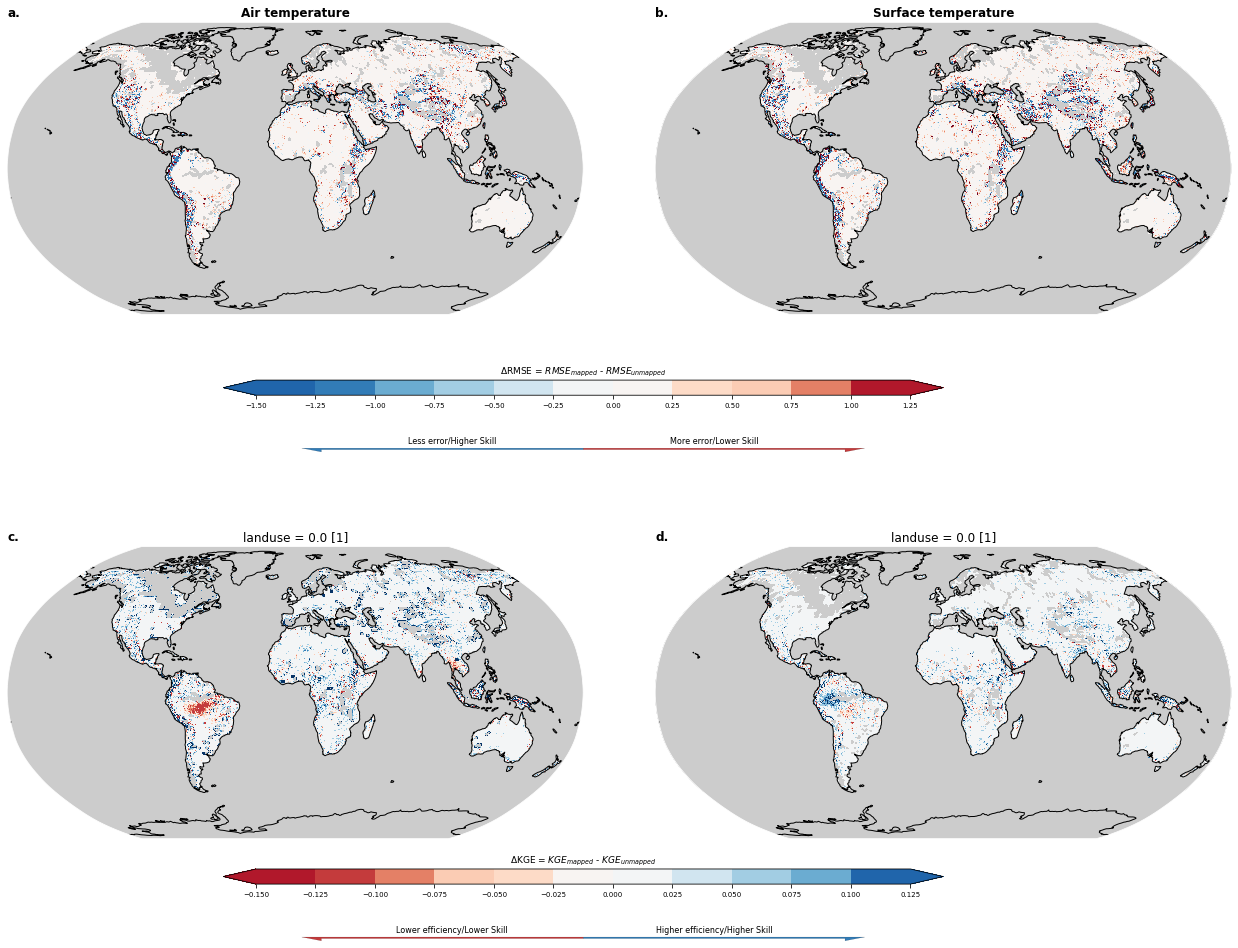

In [93]:
pos1 = [[0.1,0.6,0.4,0.35],[0.55,0.6,0.4,0.35],[0.1,0.08,0.4,0.35],[0.55,0.08,0.4,0.35]]
pos2 = [[0.25,0.55,0.5,0.015],[0.25,0.065,0.5,0.015]]


fig= plt.figure(figsize = (20,14))

# lats = rmse_dif1.lat.values
# lons = rmse_dif1.lon.values
# lons, lats = np.meshgrid(lons,lats)

ax1 = fig.add_axes(pos1[0],projection = ccrs.Robinson())
#im1 = ax1.contourf(lons,lats,rmse_dif1.rmse.values,transform = ccrs.PlateCarree(),cmap=cmaprms,norm = norm_rms)
im1 = difc1_rms.plot(ax=ax1,transform = ccrs.PlateCarree(), cmap = cmaprms, norm = norm_rms,add_colorbar=False)


ax1.set_global()
ax1.background_patch.set_facecolor('0.8')
ax1.outline_patch.set_edgecolor('1')
ax1.coastlines()

ax1.set_title('Air temperature',fontweight = 'bold')
ax1.set_title('a.',fontweight = 'bold', loc='left')

cbax = fig.add_axes(pos2[0])
cb = mpl.colorbar.ColorbarBase(ax=cbax,cmap=cmaprms,
                           norm=norm_rms,
                           ticks = values_rms,
                           spacing='proportional',
                           orientation='horizontal',
                           extend='both')
cb.ax.set_title('\u0394RMSE = $RMSE_{mapped}$ - $RMSE_{unmapped}$', fontsize=9)
#cb.ax.set_xticklabels(tick_labels1)
cb.ax.tick_params(labelsize=7)
#plot arrows
bluelabel = 'Less error/Higher Skill'
redlabel = 'More error/Lower Skill'

cb.ax.text(0.7, -3, redlabel, size=8, ha='center', va='center',transform  = cbax.transAxes)
cb.ax.text(0.3, -3, bluelabel, size=8, ha='center', va='center', transform  = cbax.transAxes)

cb.ax.arrow(0.5, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=redlabel,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap_40, edgecolor='k', clip_on=False, transform  = cbax.transAxes)
cb.ax.arrow(0.5, -3.5, -0.4, 0, width=0.2, linewidth=0.1, label=bluelabel,\
          shape='right', head_width=0.5, head_length=0.03,\
          facecolor=cmap40, edgecolor='k', clip_on=False, transform  = cbax.transAxes)


# lats = rmse_dif2.lat.values
# lons = rmse_dif2.lon.values
# lons, lats = np.meshgrid(lons,lats)
ax2 = fig.add_axes(pos1[1],projection = ccrs.Robinson())
#im1 = ax2.contourf(lons,lats,rmse_dif2.rmse.values,transform = ccrs.PlateCarree(),cmap=cmaprms,norm = norm_rms)
im1 = difc2_rms.plot(ax=ax2,transform = ccrs.PlateCarree(), cmap = cmaprms, norm = norm_rms,add_colorbar=False)

ax2.set_global()
ax2.background_patch.set_facecolor('0.8')
ax2.outline_patch.set_edgecolor('1')
ax2.coastlines()
ax2.set_title('Surface temperature',fontweight = 'bold')
ax2.set_title('b.',fontweight = 'bold', loc='left')


# lats = kge_dif1.lat.values
# lons = kge_dif1.lon.values
ax3 = fig.add_axes(pos1[2],projection = ccrs.Robinson())
#im1 = ax3.contourf(lons,lats,kge_dif1.kge.values,transform = ccrs.PlateCarree(),shading='flat',cmap=cmapkge,norm = norm_kge,latlon=True)
im1 = difc1_kge.plot(ax=ax3,transform = ccrs.PlateCarree(), cmap = cmapkge, norm = norm_kge,add_colorbar=False)

ax3.set_global()
ax3.background_patch.set_facecolor('0.8')
ax3.outline_patch.set_edgecolor('1')
ax3.coastlines()

ax3.set_ylabel('KGE (corrected)')
ax3.set_title('c.',fontweight = 'bold', loc='left')

cbax2 = fig.add_axes(pos2[1])
cb1 = mpl.colorbar.ColorbarBase(ax=cbax2,cmap=cmapkge,
                   norm=norm_kge,
                   ticks = values_kge,
                   spacing='proportional',
                   orientation='horizontal',
                   extend='both')
cb1.ax.set_title('\u0394KGE = $KGE_{mapped}$ - $KGE_{unmapped}$', fontsize=9)
#cb1.ax.set_xticklabels(tick_labels2)
cb1.ax.tick_params(labelsize=7)
#plot arrows
bluelabel1 = 'Higher efficiency/Higher Skill'
redlabel1 = 'Lower efficiency/Lower Skill'

cb1.ax.text(0.7, -3, bluelabel1,size=8, ha='center', va='center',transform  = cbax2.transAxes)
cb1.ax.text(0.3, -3, redlabel1, size=8, ha='center', va='center',transform  = cbax2.transAxes)

cb1.ax.arrow(0.5, -3.5, 0.4, 0, width=0.2, linewidth=0.1, label=bluelabel1,\
          shape='left', head_width=0.5, head_length=0.03,\
          facecolor=cmap40, edgecolor='k', clip_on=False, transform  = cbax2.transAxes)
cb1.ax.arrow(0.5, -3.5, -0.4, 0, width=0.2, linewidth=0.1, label=redlabel1,\
          shape='right', head_width=0.5, head_length=0.03,\
          facecolor=cmap_40, edgecolor='k', clip_on=False, transform  = cbax2.transAxes)

# lats = kge_dif2.lat.values
# lons = kge_dif2.lon.values
ax4 = fig.add_axes(pos1[3],projection = ccrs.Robinson())
#im1 = ax4.contourf(lons,lats,kge_dif2.kge.values,transform = ccrs.PlateCarree(),shading='flat',cmap=cmapkge,norm = norm_kge,latlon=True)
im1 = difc2_kge.plot(ax=ax4,transform = ccrs.PlateCarree(), cmap = cmapkge, norm = norm_kge,add_colorbar=False)

ax4.set_global()
ax4.background_patch.set_facecolor('0.8')
ax4.outline_patch.set_edgecolor('1')
ax4.coastlines()
ax4.set_title('d.',fontweight = 'bold', loc='left')

plt.savefig('corvctl_cesm2_map.png')